In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 4000

# Mean for each of the 10 dimensions (arbitrary mean)
mean = np.random.rand(10)

# Create a random positive-definite covariance matrix
A = np.random.rand(10, 10)
cov_matrix = np.dot(A, A.T)  # Covariance matrix (symmetric and positive-definite)

# Generate the multivariate Gaussian data
data = np.random.multivariate_normal(mean, cov_matrix, n_samples)

print(f"Data shape: {data.shape}")

Data shape: (4000, 10)



---
## PCA **from Scratch**
---


Number of components to retain 90% variance: 4


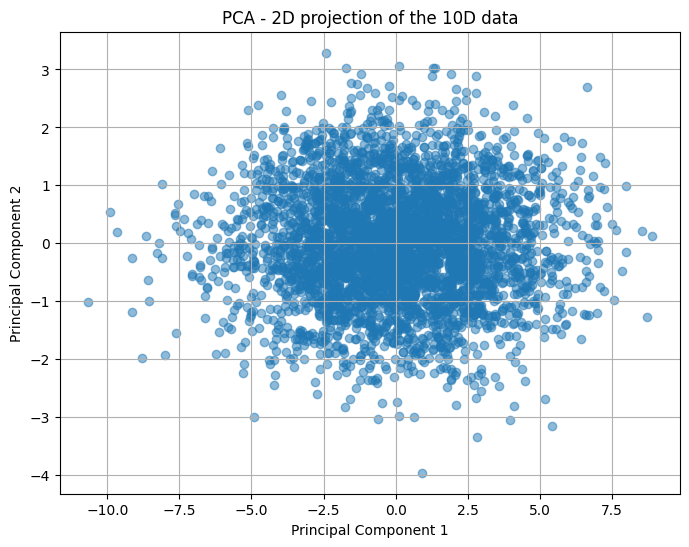

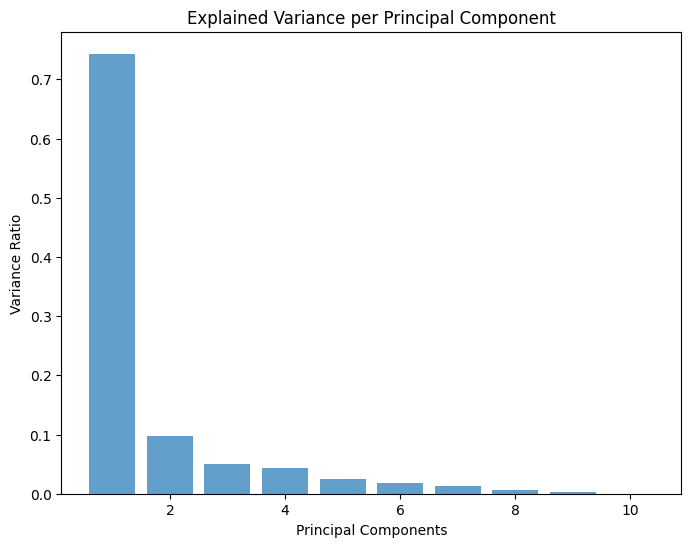

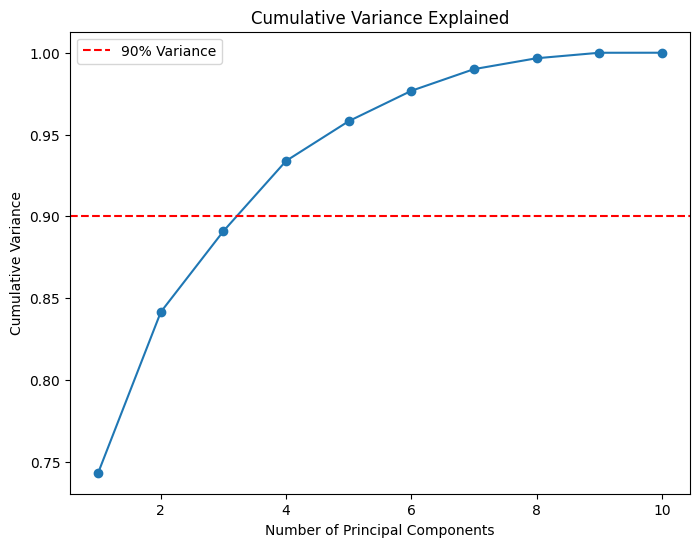

In [ ]:
# Standardize the data (subtract mean, divide by standard deviation)
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
data_standardized = (data - mean_data) / std_data

# Compute covariance matrix
cov_matrix = np.cov(data_standardized, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = eig(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]  # Sorting indices
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Cumulative variance explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Select the number of components to keep 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components}")

# Reduce the data to 2D
data_reduced = np.dot(data_standardized, eigenvectors[:, :2])

# Visualize the 2D reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5)
plt.title('PCA - 2D projection of the 10D data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Visualize cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.show()


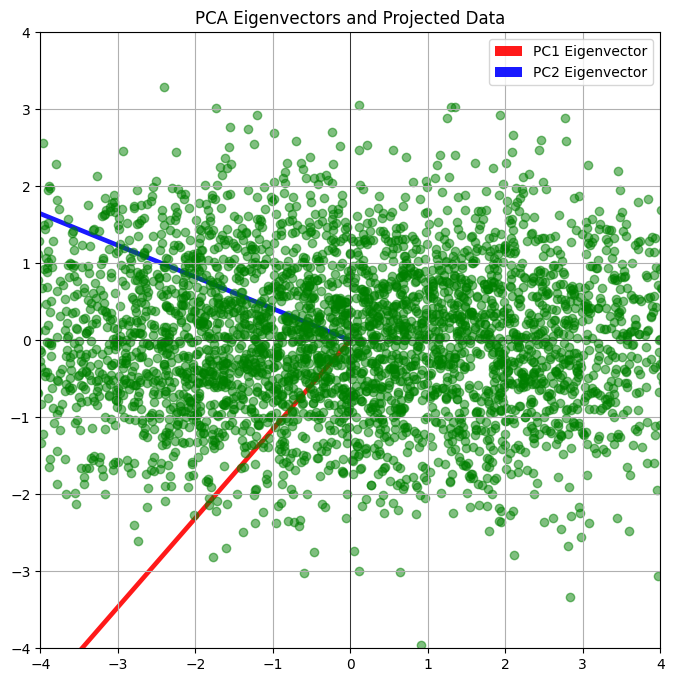

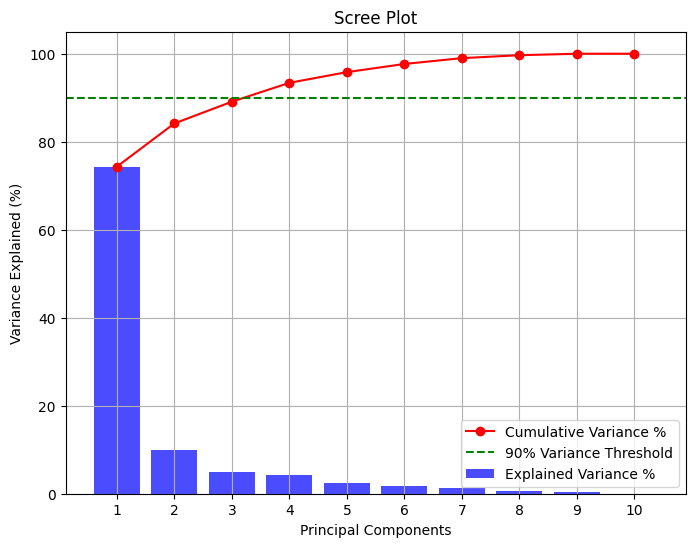

In [ ]:
# Covariance matrix
cov_matrix = np.cov(data_standardized, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Reduce the data to 2D
data_reduced = np.dot(data_standardized, eigenvectors[:, :2])

# Step 1: Enhanced eigenvector visualization
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the first two eigenvectors with enhanced visibility
origin = np.zeros(2)
ax.quiver(*origin, eigenvectors[0, 0]*3, eigenvectors[1, 0]*3,
          scale=1, color='r', label='PC1 Eigenvector', linewidth=3, alpha=0.9)
ax.quiver(*origin, eigenvectors[0, 1]*3, eigenvectors[1, 1]*3,
          scale=1, color='b', label='PC2 Eigenvector', linewidth=3, alpha=0.9)

# Scatter reduced data points
ax.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, color='green')
ax.set_title("PCA Eigenvectors and Projected Data")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

# Step 2: Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio * 100, alpha=0.7, color='blue', label='Explained Variance %')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='red', label='Cumulative Variance %')
plt.axhline(y=90, color='green', linestyle='--', label='90% Variance Threshold')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.legend()
plt.grid()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for two Gaussian distributions (10D)
mean1 = np.random.rand(10) * 5  # Random 10D mean vector for class 1
cov1 = np.eye(10)  # Identity matrix as covariance for class 1 (independent features)

mean2 = np.random.rand(10) * 5  # Random 10D mean vector for class 2
cov2 = np.eye(10) * 2  # Scaled identity matrix for class 2 (more spread)

# Generate samples
data_class1 = np.random.multivariate_normal(mean1, cov1, 180)
data_class2 = np.random.multivariate_normal(mean2, cov2, 180)

# Combine into a single dataset
data_10D = np.vstack((data_class1, data_class2))
labels = np.array([0] * 180 + [1] * 180)  # Labels for the two classes


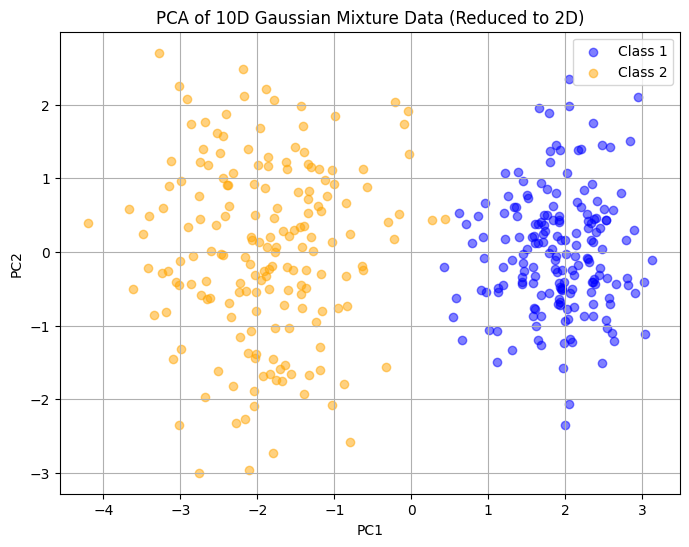

In [4]:
from sklearn.decomposition import PCA

# Standardize the data
data_10D_standardized = (data_10D - np.mean(data_10D, axis=0)) / np.std(data_10D, axis=0)

# Apply PCA
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data_10D_standardized)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_2D[labels == 0, 0], data_2D[labels == 0, 1], alpha=0.5, color='blue', label='Class 1')
plt.scatter(data_2D[labels == 1, 0], data_2D[labels == 1, 1], alpha=0.5, color='orange', label='Class 2')
plt.title('PCA of 10D Gaussian Mixture Data (Reduced to 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


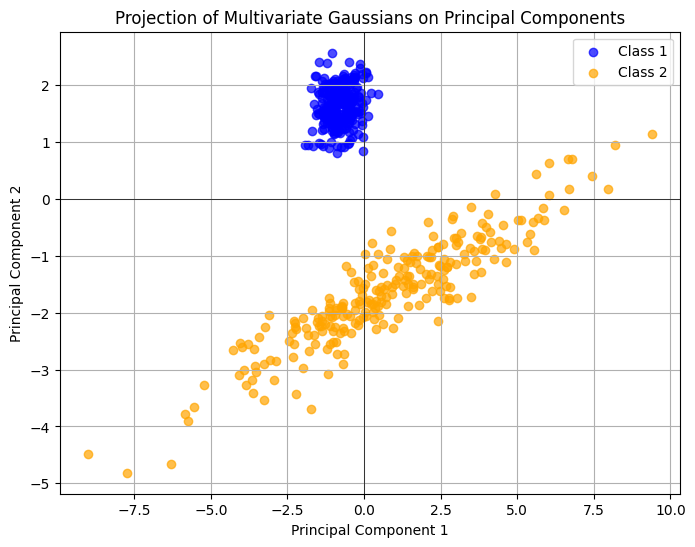

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Synthetic Data (Multivariate Gaussian Mixture)
mean1 = np.random.rand(10) * 5  # Mean of class 1 in 10D
mean2 = np.random.rand(10) * 5  # Mean of class 2 in 10D

# Covariance matrices
cov1 = np.diag(np.random.rand(10))  # Diagonal covariance for class 1
cov2 = np.random.rand(10, 10)
cov2 = np.dot(cov2, cov2.T)  # Make it symmetric positive definite for class 2

# Generate samples
class1 = np.random.multivariate_normal(mean1, cov1, 250)
class2 = np.random.multivariate_normal(mean2, cov2, 250)

# Concatenate data and create labels
data = np.vstack((class1, class2))
labels = np.hstack((np.zeros(250), np.ones(250)))

# Step 2: Standardize the Data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[labels == 0, 0], data_pca[labels == 0, 1], alpha=0.7, color='blue', label='Class 1')
plt.scatter(data_pca[labels == 1, 0], data_pca[labels == 1, 1], alpha=0.7, color='orange', label='Class 2')
plt.title('Projection of Multivariate Gaussians on Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid()
plt.show()

In [8]:
# Project data onto the first two principal components
data_reconstructed = pca.inverse_transform(data_pca)

# Measure reconstruction error
reconstruction_error = np.mean((data_standardized - data_reconstructed)**2)

print(f'Reconstruction Error (MSE): {reconstruction_error:.4f}')


Reconstruction Error (MSE): 0.1882


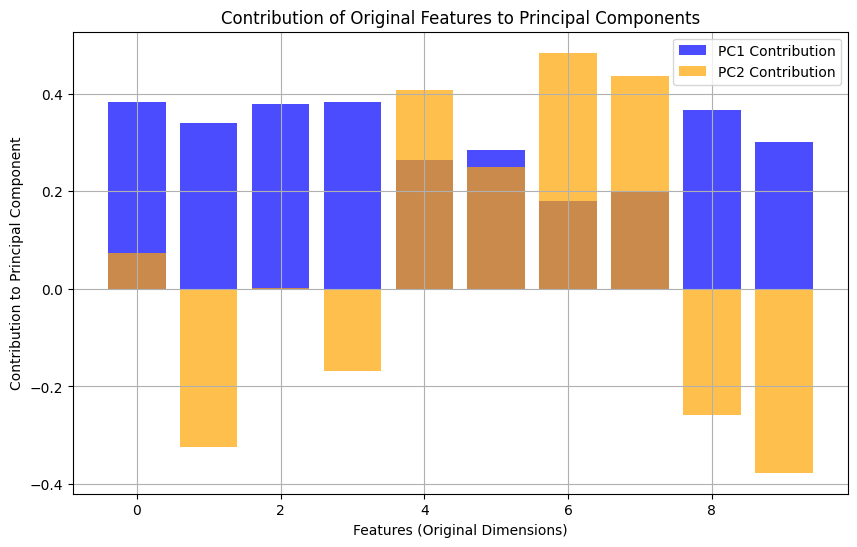

In [9]:
# Contribution of each feature to the first two principal components
plt.figure(figsize=(10, 6))
plt.bar(range(10), pca.components_[0], alpha=0.7, color='blue', label='PC1 Contribution')
plt.bar(range(10), pca.components_[1], alpha=0.7, color='orange', label='PC2 Contribution')
plt.xlabel('Features (Original Dimensions)')
plt.ylabel('Contribution to Principal Component')
plt.title('Contribution of Original Features to Principal Components')
plt.legend()
plt.grid()
plt.show()


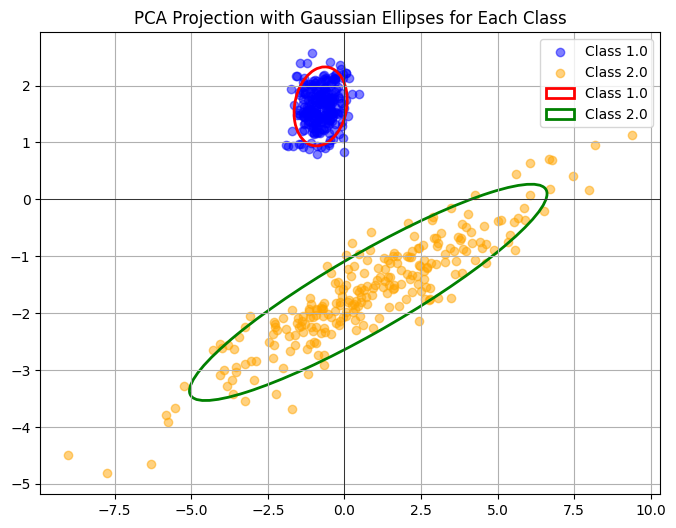

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# tracer une ellipse autour de chaque classe
def plot_gaussian_ellipse(mean, cov, ax, color, label, n_std=2):
    """Plot an ellipse representing the covariance of the class.
    n_std: number of standard deviations for the ellipse size."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov)  # décomposition
    order = np.argsort(eigenvalues)[::-1]  # Order by largest eigenvalue
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)  # Scaled by n_std

    ellipse = patches.Ellipse(xy=mean[:2], width=width, height=height, angle=angle,
                              edgecolor=color, fc='None', lw=2, label=label)
    ax.add_patch(ellipse)

# Fit Gaussian ellipses on the projected data for both classes
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'green']

# Scatter plot of PCA-projected data
for i, label in enumerate(np.unique(labels)):
    ax.scatter(data_pca[labels == label, 0], data_pca[labels == label, 1],
               color=colors[i], alpha=0.5, label=f'Class {label+1}')

# Compute mean and covariance matrix of the projected PCA data for each class
for i, label in enumerate(np.unique(labels)):
    class_data = data_pca[labels == label]
    mean_class = np.mean(class_data, axis=0)
    cov_class = np.cov(class_data, rowvar=False)  # Covariance matrix

    # Plot Gaussian ellipses with a 2-standard deviation size
    plot_gaussian_ellipse(mean_class, cov_class, ax, colors[i+2], f'Class {label+1}', n_std=2)

# Finalize plot
ax.set_title('PCA Projection with Gaussian Ellipses for Each Class')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()

Taille des données : (500, 20)
Matrice de covariance de la classe 1.0:
[[0.11808408 0.00842311]
 [0.00842311 0.07100531]]

Matrice de covariance de la classe 2.0:
[[23.62450633  1.36860488]
 [ 1.36860488  0.37840382]]



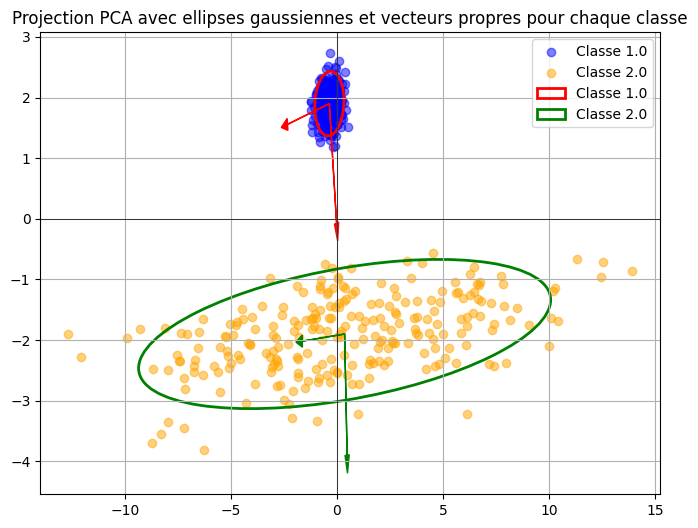

Erreur de reconstruction (MSE): 0.2107
Comparaison avec le cas précédent (10D) :
 - Dimensions actuelles : 20D
 - Taille des données : (500, 20)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches

# Étape 1: Génération de données synthétiques (Mélange Gaussien Multivarié en 20D)
mean1 = np.random.rand(20) * 5  # Moyenne de la classe 1 en 20D
mean2 = np.random.rand(20) * 5  # Moyenne de la classe 2 en 20D

# Matrices de covariance
cov1 = np.diag(np.random.rand(20))  # Covariance diagonale pour la classe 1
cov2 = np.random.rand(20, 20)
cov2 = np.dot(cov2, cov2.T)  # Rendre symétrique et définie positive pour la classe 2

# Générer des échantillons
class1 = np.random.multivariate_normal(mean1, cov1, 250)
class2 = np.random.multivariate_normal(mean2, cov2, 250)

# Concaténer les données et créer les labels
data = np.vstack((class1, class2))
labels = np.hstack((np.zeros(250), np.ones(250)))

# Taille des données
data_size = data.shape
print(f"Taille des données : {data_size}")  # Affichage de la taille des données (nombre d'échantillons, dimensions)

# Étape 2: Standardisation des données
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Étape 3: Appliquer PCA (2 composantes principales)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Étape 4: Visualisation avec les ellipses de Gaussiennes pour chaque classe et vecteurs propres
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'green']

# Fonction pour tracer une ellipse gaussienne
def plot_gaussian_ellipse(mean, cov, ax, color, label, n_std=2):
    """Trace une ellipse représentant la covariance de la classe.
    n_std : nombre d'écarts-types pour la taille de l'ellipse."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov)  # Décomposition
    order = np.argsort(eigenvalues)[::-1]  # Trier par la plus grande valeur propre
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))  # Calcul de l'angle
    width, height = 2 * n_std * np.sqrt(eigenvalues)  # Scaler avec n_std

    ellipse = patches.Ellipse(xy=mean[:2], width=width, height=height, angle=angle,
                              edgecolor=color, fc='None', lw=2, label=label)
    ax.add_patch(ellipse)

    # Tracer les vecteurs propres (directions principales) sous forme de flèches
    for i in range(2):  # On ne montre que les deux premières dimensions
        ax.arrow(mean[0], mean[1], eigenvectors[0, i] * 2, eigenvectors[1, i] * 2,
                 head_width=0.2, head_length=0.3, fc=color, ec=color)

# Tracer les points projetés avec les ellipses de covariance pour chaque classe
for i, label in enumerate(np.unique(labels)):
    ax.scatter(data_pca[labels == label, 0], data_pca[labels == label, 1],
               color=colors[i], alpha=0.5, label=f'Classe {label+1}')

# Calcul de la moyenne et de la covariance des données projetées pour chaque classe
for i, label in enumerate(np.unique(labels)):
    class_data = data_pca[labels == label]
    mean_class = np.mean(class_data, axis=0)
    cov_class = np.cov(class_data, rowvar=False)  # Matrice de covariance

    # Affichage de la matrice de covariance pour chaque classe
    print(f"Matrice de covariance de la classe {label+1}:\n{cov_class}\n")

    # Tracer des ellipses gaussiennes à 2 écarts-types et flèches pour vecteurs propres
    plot_gaussian_ellipse(mean_class, cov_class, ax, colors[i+2], f'Classe {label+1}', n_std=2)

# Finalisation du tracé
ax.set_title('Projection PCA avec ellipses gaussiennes et vecteurs propres pour chaque classe')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()

# Mesure de l'erreur de reconstruction après la projection
data_reconstructed = pca.inverse_transform(data_pca)
reconstruction_error = np.mean((data_standardized - data_reconstructed)**2)
print(f'Erreur de reconstruction (MSE): {reconstruction_error:.4f}')

# Comparaison avec le cas précédent de 10D
print(f"Comparaison avec le cas précédent (10D) :\n - Dimensions actuelles : 20D\n - Taille des données : {data_size}")


Variance expliquée par chaque composante principale: [0.59770734 0.19159482]


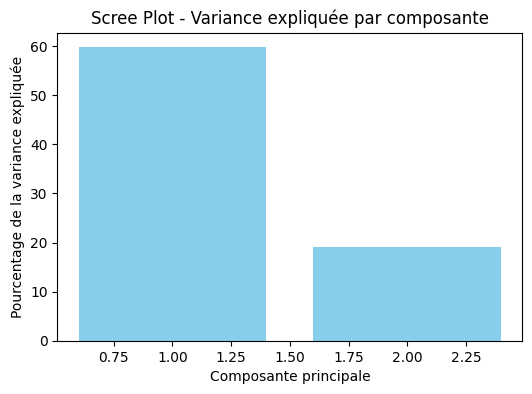

In [17]:
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par chaque composante principale: {explained_variance}")

# Visualisation du ratio de variance expliquée
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='skyblue')
plt.xlabel('Composante principale')
plt.ylabel('Pourcentage de la variance expliquée')
plt.title('Scree Plot - Variance expliquée par composante')
plt.show()


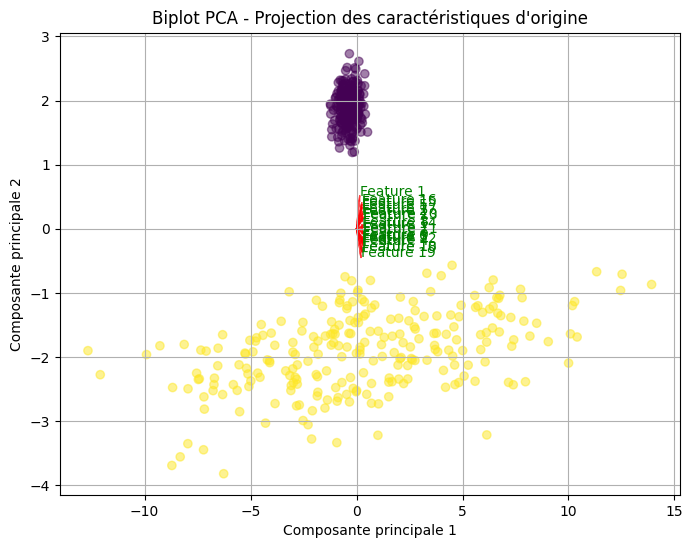

In [18]:
# Tracer un biplot (vecteurs des caractéristiques originales projetés dans l'espace PCA)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
for i, feature in enumerate(scaler.mean_):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2,
             f"Feature {i+1}", color='g')

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Biplot PCA - Projection des caractéristiques d'origine")
plt.grid(True)
plt.show()

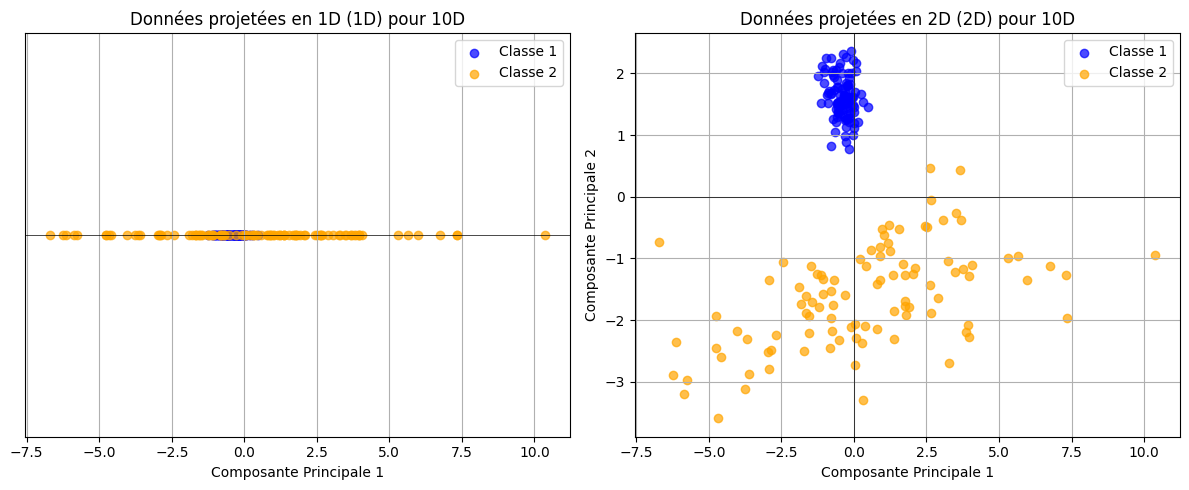

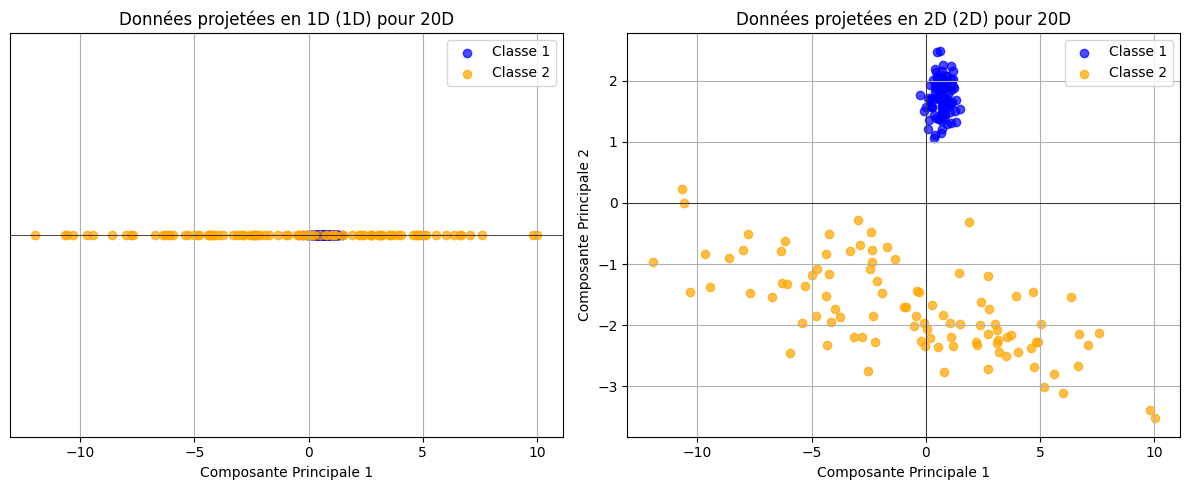

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour générer des données synthétiques
def generate_data(n_samples, n_features):
    """Générer des données multivariées avec deux classes."""
    mean1 = np.random.rand(n_features) * 5
    mean2 = np.random.rand(n_features) * 5

    cov1 = np.diag(np.random.rand(n_features))  # Covariance diagonale
    cov2 = np.random.rand(n_features, n_features)
    cov2 = np.dot(cov2, cov2.T)  # Matrice de covariance positive définie

    class1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)
    class2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)

    data = np.vstack((class1, class2))
    labels = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

    return data, labels

# Standardiser les données
def standardize_data(X):
    """Standardiser les données pour avoir une moyenne de 0 et un écart type de 1."""
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Calculer la matrice de covariance
def covariance_matrix(X):
    """Calculer la matrice de covariance de X."""
    return np.cov(X, rowvar=False)

# Décomposition en valeurs propres
def eigen_decomposition(cov_matrix):
    """Calculer les valeurs propres et les vecteurs propres."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

# Trier les valeurs et vecteurs propres
def sort_eigenpairs(eigenvalues, eigenvectors):
    """Trier les valeurs et vecteurs propres par ordre décroissant."""
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

# Projeter les données sur les composantes principales
def project_data(X, eigenvectors, num_components):
    """Projeter les données sur les num_components premières composantes principales."""
    return X.dot(eigenvectors[:, :num_components])

# Fonction principale pour exécuter PCA sur 10D et 20D
def run_pca_and_visualize(n_samples, n_features):
    # Étape 1: Générer les données
    data, labels = generate_data(n_samples, n_features)

    # Étape 2: Standardiser les données
    data_standardized = standardize_data(data)

    # Étape 3: Calculer la matrice de covariance
    cov_matrix = covariance_matrix(data_standardized)

    # Étape 4: Calculer les valeurs et vecteurs propres
    eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

    # Étape 5: Trier les valeurs et vecteurs propres
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenpairs(eigenvalues, eigenvectors)

    # Étape 6: Projection des données sur les composantes principales
    # Projeter sur 1D (1 composante principale)
    data_pca_1d = project_data(data_standardized, sorted_eigenvectors, 1)

    # Projeter sur 2D (2 composantes principales)
    data_pca_2d = project_data(data_standardized, sorted_eigenvectors, 2)

    # Visualisation des données projetées en 1D
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(data_pca_1d[labels == 0], np.zeros_like(data_pca_1d[labels == 0]),
                alpha=0.7, color='blue', label='Classe 1')
    plt.scatter(data_pca_1d[labels == 1], np.zeros_like(data_pca_1d[labels == 1]),
                alpha=0.7, color='orange', label='Classe 2')
    plt.title(f'Données projetées en 1D (1D) pour {n_features}D')
    plt.xlabel('Composante Principale 1')
    plt.yticks([])
    plt.axhline(0, color='black', lw=0.5)
    plt.legend()
    plt.grid()

    # Visualisation des données projetées en 2D
    plt.subplot(1, 2, 2)
    plt.scatter(data_pca_2d[labels == 0, 0], data_pca_2d[labels == 0, 1],
                alpha=0.7, color='blue', label='Classe 1')
    plt.scatter(data_pca_2d[labels == 1, 0], data_pca_2d[labels == 1, 1],
                alpha=0.7, color='orange', label='Classe 2')
    plt.title(f'Données projetées en 2D (2D) pour {n_features}D')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Exécuter PCA pour 10D
run_pca_and_visualize(n_samples=200, n_features=10)

# Exécuter PCA pour 20D
run_pca_and_visualize(n_samples=200, n_features=20)


In [ ]:
# Standardize the data
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
data_standardized = (data - mean_data) / std_data

# Covariance matrix of standardized data
cov_matrix_std = np.cov(data_standardized, rowvar=False)

# Save data for Manim
np.savez('pca_data.npz', data=data, data_reduced=data_reduced, cov_matrix=cov_matrix_std, eigenvectors=eigenvectors, eigenvalues=eigenvalues)

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
# Install system dependencies for manim
!apt update
!apt install -y libcairo2-dev libpango1.0-dev ffmpeg pkg-config python3-dev

# Install manim
!pip install manim

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,601

In [ ]:
from manim import *

class PCAVisualization(Scene):
    def construct(self):
        # Create a grid to represent the 2D space
        axes = Axes(
            x_range=[-4, 4],
            y_range=[-4, 4],
            axis_config={"color": BLUE}
        )

        # Plot points in 2D
        points = np.array([[-2, 2], [1, 2], [3, 1], [-3, -2], [0, 0]])
        manim_points = [Dot(axes.coords_to_point(x, y)) for x, y in points]
        dots = VGroup(*manim_points)

        # Eigenvectors as arrows
        eig_vec1 = Arrow(start=ORIGIN, end=axes.coords_to_point(2, 1), buff=0).set_color(RED)
        eig_vec2 = Arrow(start=ORIGIN, end=axes.coords_to_point(1, 2), buff=0).set_color(GREEN)

        self.play(Create(axes), Create(dots), Create(eig_vec1), Create(eig_vec2))
        self.wait()

        # Project the points onto the principal components
        projected_points = np.dot(points, np.array([[2, 1], [1, 2]]).T)
        projected_manim_points = [Dot(axes.coords_to_point(x, y)).set_color(YELLOW) for x, y in projected_points]
        projected_dots = VGroup(*projected_manim_points)

        self.play(Transform(dots, projected_dots))
        self.wait()



In [ ]:
!manim -qh PCA_scene1_2D.py PCAVisualization

Manim Community v0.18.1

[10/23/24 06:30:10] INFO     Animation 0 : Partial movie file written in    ]8;id=830099;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=521699;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/PCA_scene1_2D/480p15/pa                         
                             rtial_movie_files/PCAVisualization/1185818338_                         
                             1812401922_223132457.mp4'                                              
                    INFO     Animation 1 : Partial movie file written in    ]8;id=180231;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=93448;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/PCA

In [ ]:
%%writefile pca_manim_scene.py
from manim import *
import numpy as np

class CovarianceMatrixScene(Scene):
    def construct(self):
        # Load data
        data = np.load('pca_data.npz')
        cov_matrix = data['cov_matrix']

        # Round and convert to list for Manim
        cov_matrix_list = np.round(cov_matrix, 2).tolist()

        # Create a matrix object
        matrix_mobject = Matrix(cov_matrix_list)
        matrix_mobject.scale(0.5)  # Adjust size

        # Add a title
        title = Text("Covariance Matrix").to_edge(UP)

        # Display the matrix
        self.play(Write(title))
        self.play(Create(matrix_mobject))
        self.wait(2)


Overwriting pca_manim_scene.py


In [ ]:
class PCAVisualization(Scene):
    def construct(self):
        # Load data
        data = np.load('pca_data.npz')
        data_reduced = data['data_reduced']
        eigenvectors = data['eigenvectors']

        # Get the first two eigenvectors
        eig_vec1 = eigenvectors[:, 0]
        eig_vec2 = eigenvectors[:, 1]

        # Create Axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-5, 5, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True}
        ).add_coordinates()

        # Add labels
        labels = axes.get_axis_labels(x_label="PC1", y_label="PC2")

        # Sample 500 data points for visualization
        sample_indices = np.random.choice(len(data_reduced), size=500, replace=False)
        data_sample = data_reduced[sample_indices]

        # Plot the data points
        dots = VGroup(*[
            Dot(axes.coords_to_point(x, y), radius=0.02, color=BLUE)
            for x, y in data_sample
        ])

        # Create eigenvectors as arrows
        eig_vec1_arrow = Arrow(
            start=axes.coords_to_point(0, 0),
            end=axes.coords_to_point(eig_vec1[0]*3, eig_vec1[1]*3),
            buff=0,
            color=RED
        ).set_z_index(1)

        eig_vec2_arrow = Arrow(
            start=axes.coords_to_point(0, 0),
            end=axes.coords_to_point(eig_vec2[0]*3, eig_vec2[1]*3),
            buff=0,
            color=GREEN
        ).set_z_index(1)

        # Animate the scene
        self.play(Create(axes), Create(labels))
        self.play(FadeIn(dots, lag_ratio=0.01, run_time=2))
        self.play(GrowArrow(eig_vec1_arrow), GrowArrow(eig_vec2_arrow))
        self.wait(2)


In [ ]:
class ScreePlotScene(Scene):
    def construct(self):
        # Load data
        data = np.load('pca_data.npz')
        eigenvalues = data['eigenvalues']
        explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
        cumulative_variance = np.cumsum(explained_variance_ratio)

        # Number of components
        n_components = len(eigenvalues)

        # Create bars for explained variance
        bars = VGroup()
        for i in range(n_components):
            bar_height = explained_variance_ratio[i]*5
            bar = Rectangle(
                width=0.4,
                height=bar_height,
                color=BLUE,
                fill_opacity=0.7
            )
            bar.move_to(np.array([i - n_components/2 + 0.5, bar_height/2 - 2.5, 0]))
            bars.add(bar)

        # Create line for cumulative variance
        cumulative_points = [
            np.array([i - n_components/2 + 0.5, cumulative_variance[i]*5 - 2.5, 0]) for i in range(n_components)
        ]
        cumulative_graph = VMobject(color=RED)
        cumulative_graph.set_points_as_corners(cumulative_points)

        # Threshold line at 90%
        threshold_y = 0.9 * 5 - 2.5
        threshold_line = DashedLine(
            start=np.array([-n_components/2, threshold_y, 0]),
            end=np.array([n_components/2, threshold_y, 0]),
            color=GREEN
        )
        threshold_label = Text("90% Variance Threshold", font_size=24).next_to(threshold_line, RIGHT)

        # Animate
        self.play(Create(bars))
        self.play(Create(cumulative_graph))
        self.play(Create(threshold_line), Write(threshold_label))
        self.wait(2)


In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive-full

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pac

In [ ]:
!manim -qh pca_manim_scene.py CovarianceMatrixScene
!manim -qh pca_manim_scene.py PCAVisualization
!manim -qh pca_manim_scene.py ScreePlotScene

Manim Community v0.18.1

sh: 1: latex: not found
╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/manim/cli/render/commands.py:120 in render               │
│                                                                                                  │
│   117 │   │   │   try:                                                                           │
│   118 │   │   │   │   with tempconfig({}):                                                       │
│   119 │   │   │   │   │   scene = SceneClass()                                                   │
│ ❱ 120 │   │   │   │   │   scene.render()                                                         │
│   121 │   │   │   except Exception:                                                              │
│   122 │   │   │   │   error_console.print_exception()                                            │
│   123 │   │   │   │   sys.exit(1)       

In [ ]:
from IPython.display import Video

# Covariance Matrix Scene
Video("media/videos/pca_manim_scene/1080p60/CovarianceMatrixScene.mp4", embed=True)

In [ ]:
# PCA Visualization Scene
Video("media/videos/pca_manim_scene/1080p60/PCAVisualization.mp4", embed=True)

In [ ]:
%%writefile pca_manim_scene.py
from manim import *
import numpy as np
from numpy.linalg import eig

class PCAVisualization(Scene):
    def construct(self):
        # Step 1: Generate Data
        np.random.seed(42)
        mean = np.random.rand(10)
        A = np.random.rand(10, 10)
        cov_matrix = np.dot(A, A.T)
        data = np.random.multivariate_normal(mean, cov_matrix, 4000)

        # Standardize the data
        data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

        # Covariance matrix
        cov_matrix_standardized = np.cov(data_standardized, rowvar=False)

        # Eigen decomposition
        eigenvalues, eigenvectors = eig(cov_matrix_standardized)

        # Sort eigenvalues and eigenvectors
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Explained variance ratio
        explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
        cumulative_variance = np.cumsum(explained_variance_ratio)

        # Step 2: Reduce data to 2D for visualization
        data_reduced = np.dot(data_standardized, eigenvectors[:, :2])

        # Create the axes for visualization
        axes = Axes(
            x_range=[-4, 4],
            y_range=[-4, 4],
            axis_config={"color": BLUE}
        ).add_coordinates()

        # Eigenvectors as arrows
        eig_vec1 = Arrow(start=ORIGIN, end=axes.coords_to_point(eigenvectors[0, 0]*3, eigenvectors[1, 0]*3), buff=0, color=RED)
        eig_vec2 = Arrow(start=ORIGIN, end=axes.coords_to_point(eigenvectors[0, 1]*3, eigenvectors[1, 1]*3), buff=0, color=GREEN)

        # Display eigenvalues and eigenvectors text
        eigenvalues_text = Tex(f"Eigenvalues: {np.round(eigenvalues[:2], 2)}")
        eigenvalues_text.to_corner(UP + LEFT)

        # Step 3: Plot the data points in reduced 2D space
        manim_points = [Dot(axes.coords_to_point(x, y)).set_color(WHITE).scale(0.5) for x, y in data_reduced[:100]]  # Show only 100 points
        dots = VGroup(*manim_points)

        # Step 4: Show covariance matrix (as a table)
        cov_matrix_text = Tex(f"Covariance Matrix (10x10)").to_corner(UP + RIGHT)
        self.play(Create(axes), Write(cov_matrix_text), Write(eigenvalues_text))
        self.play(Create(dots))
        self.play(Create(eig_vec1), Create(eig_vec2))
        self.wait()

        # Step 5: Scree Plot visualization (on a number line or bar chart)
        scree_plot = NumberLine(x_range=[1, len(eigenvalues)+1], length=8, include_tip=True, include_numbers=True)
        scree_plot.to_edge(DOWN)
        scree_bars = VGroup(*[BarChart([explained_variance_ratio[i] * 100], max_value=explained_variance_ratio[0] * 100).move_to(scree_plot.n2p(i+1)) for i in range(10)])

        scree_plot_title = Text("Scree Plot: Explained Variance").next_to(scree_plot, UP)

        self.play(Create(scree_plot), Write(scree_plot_title))
        self.play(Create(scree_bars))
        self.wait()


In [ ]:
!manim -ql pca_manim_scene.py PCAVisualization

Manim Community v0.18.1

[10/23/24 06:46:26] INFO     Animation 0 : Partial movie file written in    ]8;id=388859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=761318;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/PCA_scene1_2D/1080p60/p                         
                             artial_movie_files/PCAVisualization/3529212410                         
                             _1812401922_223132457.mp4'                                             
[10/23/24 06:46:29] INFO     Animation 1 : Partial movie file written in    ]8;id=428899;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=515166;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/PC

In [ ]:
from IPython.display import Video

# Display the video file from the media folder
Video("media/videos/pca_manim_scene/480p15/PCAVisualization.mp4")
